<a href="https://colab.research.google.com/github/AbdullrahmanTarek75/Data-analysis/blob/main/weather.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Hourly energy demand generation and weather**

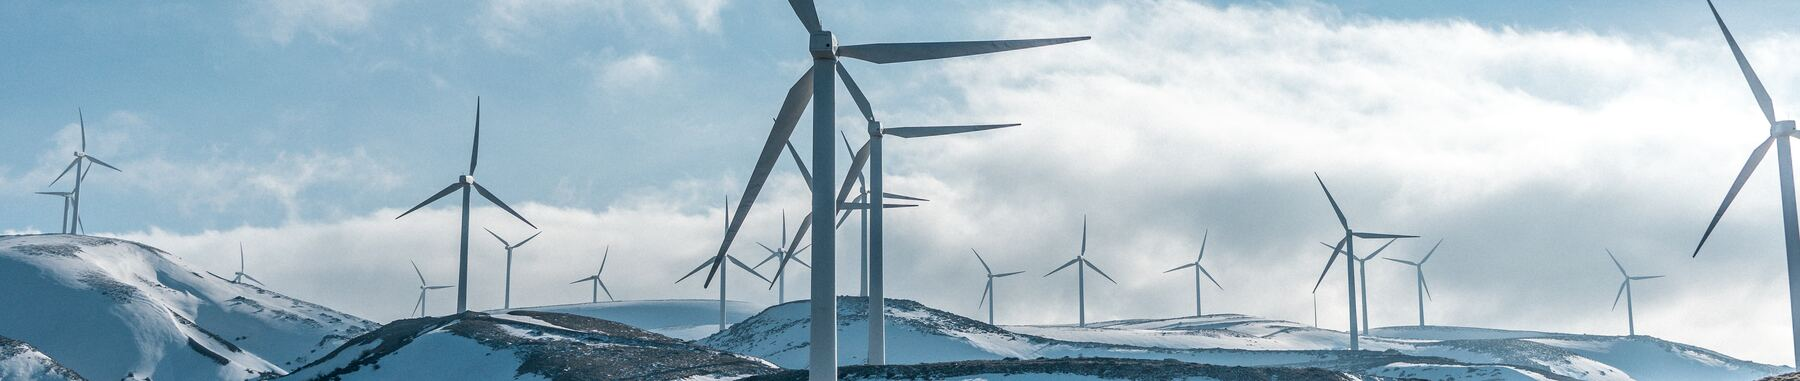

**dt_iso**: Date and time in ISO format.

**city_name**: Name of the city where the weather data was recorded.

**temp**: Current temperature (usually in Celsius or Kelvin).

**temp_min**: Minimum temperature recorded during the time period.

**temp_max**: Maximum temperature recorded during the time period.

**pressure**: Atmospheric pressure (in hPa).

**humidity**: Humidity percentage.

**wind_speed**: Wind speed (in meters per second or kilometers per hour).

**wind_deg**: Wind direction (in degrees).

**rain_1h**: Amount of rainfall in the last 1 hour (usually in millimeters).

**rain_3h**: Amount of rainfall in the last 3 hours (usually in millimeters).

**snow_3h**: Amount of snowfall in the last 3 hours (usually in millimeters).

**clouds_all**: Cloud cover percentage.

**weather_id**: Weather condition ID (from a predefined set of conditions).

**weather_main**: Main weather condition (e.g., Rain, Snow, Clear).

**weather_description**: Detailed weather description (e.g., light rain, heavy snow).

**weather_icon**: Code for the weather icon representing the conditions.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler



In [ ]:
df=pd.read_csv('/content/weather_features.csv')

In [ ]:
df

,dt_iso,city_name,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
0,2015-01-01 00:00:00+01:00,Valencia,270.475,270.475,270.475,1001,77,1,62,0.0,0.0,0.0,0,800,clear,sky is clear,01n
1,2015-01-01 01:00:00+01:00,Valencia,270.475,270.475,270.475,1001,77,1,62,0.0,0.0,0.0,0,800,clear,sky is clear,01n
2,2015-01-01 02:00:00+01:00,Valencia,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n
3,2015-01-01 03:00:00+01:00,Valencia,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n
4,2015-01-01 04:00:00+01:00,Valencia,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178391,2018-12-31 19:00:00+01:00,Seville,287.760,287.150,288.150,1028,54,3,30,0.0,0.0,0.0,0,800,clear,sky is clear,01n
178392,2018-12-31 20:00:00+01:00,Seville,285.760,285.150,286.150,1029,62,3,30,0.0,0.0,0.0,0,800,clear,sky is clear,01n
178393,2018-12-31 21:00:00+01:00,Seville,285.150,285.150,285.150,1028,58,4,50,0.0,0.0,0.0,0,800,clear,sky is clear,01n
178394,2018-12-31 22:00:00+01:00,Seville,284.150,284.150,284.150,1029,57,4,60,0.0,0.0,0.0,0,800,clear,sky is clear,01n


In [ ]:
df.shape

(178396, 17)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178396 entries, 0 to 178395
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   dt_iso               178396 non-null  object 
 1   city_name            178396 non-null  object 
 2   temp                 178396 non-null  float64
 3   temp_min             178396 non-null  float64
 4   temp_max             178396 non-null  float64
 5   pressure             178396 non-null  int64  
 6   humidity             178396 non-null  int64  
 7   wind_speed           178396 non-null  int64  
 8   wind_deg             178396 non-null  int64  
 9   rain_1h              178396 non-null  float64
 10  rain_3h              178396 non-null  float64
 11  snow_3h              178396 non-null  float64
 12  clouds_all           178396 non-null  int64  
 13  weather_id           178396 non-null  int64  
 14  weather_main         178396 non-null  object 
 15  weather_descripti

In [ ]:
df.describe()
#

,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_id
count,178396.000000,178396.000000,178396.000000,1.783960e+05,178396.000000,178396.00000,178396.000000,178396.000000,178396.000000,178396.000000,178396.000000,178396.000000
mean,289.618605,288.330442,291.091267,1.069261e+03,68.423457,2.47056,166.591190,0.075492,0.000380,0.004763,25.073292,759.831902
std,8.026199,7.955491,8.612454,5.969632e+03,21.902888,2.09591,116.611927,0.398847,0.007288,0.222604,30.774129,108.733223
min,262.240000,262.240000,262.240000,0.000000e+00,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,200.000000
25%,283.670000,282.483602,284.650000,1.013000e+03,53.000000,1.00000,55.000000,0.000000,0.000000,0.000000,0.000000,800.000000
50%,289.150000,288.150000,290.150000,1.018000e+03,72.000000,2.00000,177.000000,0.000000,0.000000,0.000000,20.000000,800.000000
75%,295.150000,293.730125,297.150000,1.022000e+03,87.000000,4.00000,270.000000,0.000000,0.000000,0.000000,40.000000,801.000000
max,315.600000,315.150000,321.150000,1.008371e+06,100.000000,133.00000,360.000000,12.000000,2.315000,21.500000,100.000000,804.000000


In [ ]:
df.isnull().sum()

,0
dt_iso,0
city_name,0
temp,0
temp_min,0
temp_max,0
pressure,0
humidity,0
wind_speed,0
wind_deg,0
rain_1h,0


In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isnull().sum()

,0
dt_iso,0
city_name,0
temp,0
temp_min,0
temp_max,0
pressure,0
humidity,0
wind_speed,0
wind_deg,0
rain_1h,0


In [ ]:
df.duplicated().sum()


21

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.duplicated().sum()


0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 178375 entries, 0 to 178395
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   dt_iso               178375 non-null  object 
 1   city_name            178375 non-null  object 
 2   temp                 178375 non-null  float64
 3   temp_min             178375 non-null  float64
 4   temp_max             178375 non-null  float64
 5   pressure             178375 non-null  int64  
 6   humidity             178375 non-null  int64  
 7   wind_speed           178375 non-null  int64  
 8   wind_deg             178375 non-null  int64  
 9   rain_1h              178375 non-null  float64
 10  rain_3h              178375 non-null  float64
 11  snow_3h              178375 non-null  float64
 12  clouds_all           178375 non-null  int64  
 13  weather_id           178375 non-null  int64  
 14  weather_main         178375 non-null  object 
 15  weather_description  1

In [ ]:
df['dt_iso'] = pd.to_datetime(df['dt_iso'])
print(type(df['dt_iso'].loc[0]))


<class 'pandas._libs.tslibs.timestamps.Timestamp'>


<ipython-input-115-11f8ced956a7>:1: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df['dt_iso'] = pd.to_datetime(df['dt_iso'])


In [ ]:
print(type(df['dt_iso'].loc[0]))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 178375 entries, 0 to 178395
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   dt_iso               178375 non-null  object 
 1   city_name            178375 non-null  object 
 2   temp                 178375 non-null  float64
 3   temp_min             178375 non-null  float64
 4   temp_max             178375 non-null  float64
 5   pressure             178375 non-null  int64  
 6   humidity             178375 non-null  int64  
 7   wind_speed           178375 non-null  int64  
 8   wind_deg             178375 non-null  int64  
 9   rain_1h              178375 non-null  float64
 10  rain_3h              178375 non-null  float64
 11  snow_3h              178375 non-null  float64
 12  clouds_all           178375 non-null  int64  
 13  weather_id           178375 non-null  int64  
 14  weather_main         178375 non-null  object 
 15  weather_description  1

In [ ]:
print(df['dt_iso'])

0         2015-01-01 00:00:00+01:00
1         2015-01-01 01:00:00+01:00
2         2015-01-01 02:00:00+01:00
3         2015-01-01 03:00:00+01:00
4         2015-01-01 04:00:00+01:00
                    ...            
178391    2018-12-31 19:00:00+01:00
178392    2018-12-31 20:00:00+01:00
178393    2018-12-31 21:00:00+01:00
178394    2018-12-31 22:00:00+01:00
178395    2018-12-31 23:00:00+01:00
Name: dt_iso, Length: 178375, dtype: object


In [ ]:
le = LabelEncoder()
df['weather_main'] = le.fit_transform(df['weather_main'])
df['weather_description'] = le.fit_transform(df['weather_description'])


In [ ]:
df

,dt_iso,city_name,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
0,2015-01-01 00:00:00+01:00,Valencia,270.475,270.475,270.475,1001,77,1,62,0.0,0.0,0.0,0,800,0,33,01n
1,2015-01-01 01:00:00+01:00,Valencia,270.475,270.475,270.475,1001,77,1,62,0.0,0.0,0.0,0,800,0,33,01n
2,2015-01-01 02:00:00+01:00,Valencia,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,800,0,33,01n
3,2015-01-01 03:00:00+01:00,Valencia,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,800,0,33,01n
4,2015-01-01 04:00:00+01:00,Valencia,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,800,0,33,01n
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178391,2018-12-31 19:00:00+01:00,Seville,287.760,287.150,288.150,1028,54,3,30,0.0,0.0,0.0,0,800,0,33,01n
178392,2018-12-31 20:00:00+01:00,Seville,285.760,285.150,286.150,1029,62,3,30,0.0,0.0,0.0,0,800,0,33,01n
178393,2018-12-31 21:00:00+01:00,Seville,285.150,285.150,285.150,1028,58,4,50,0.0,0.0,0.0,0,800,0,33,01n
178394,2018-12-31 22:00:00+01:00,Seville,284.150,284.150,284.150,1029,57,4,60,0.0,0.0,0.0,0,800,0,33,01n


In [ ]:
x=df.iloc[: ,:-1].values
y=df.iloc[: ,-1].values



In [ ]:
x


array([[Timestamp('2015-01-01 00:00:00+0100', tz='UTC+01:00'),
        'Valencia', 270.475, ..., 800, 0, 33],
       [Timestamp('2015-01-01 01:00:00+0100', tz='UTC+01:00'),
        'Valencia', 270.475, ..., 800, 0, 33],
       [Timestamp('2015-01-01 02:00:00+0100', tz='UTC+01:00'),
        'Valencia', 269.686, ..., 800, 0, 33],
       ...,
       [Timestamp('2018-12-31 21:00:00+0100', tz='UTC+01:00'), 'Seville',
        285.15, ..., 800, 0, 33],
       [Timestamp('2018-12-31 22:00:00+0100', tz='UTC+01:00'), 'Seville',
        284.15, ..., 800, 0, 33],
       [Timestamp('2018-12-31 23:00:00+0100', tz='UTC+01:00'), 'Seville',
        283.97, ..., 800, 0, 33]], dtype=object)

In [ ]:
z=df.iloc[:,2:-1]

In [ ]:
z=StandardScaler().fit_transform(z)

In [ ]:
z

array([[-2.38504983, -2.2443454 , -2.39368502, ...,  0.36943539,
        -0.59671473,  0.86590475],
       [-2.38504983, -2.2443454 , -2.39368502, ...,  0.36943539,
        -0.59671473,  0.86590475],
       [-2.48334934, -2.34351887, -2.48529332, ...,  0.36943539,
        -0.59671473,  0.86590475],
       ...,
       [-0.55672879, -0.39976901, -0.6898171 , ...,  0.36943539,
        -0.59671473,  0.86590475],
       [-0.68131625, -0.52546417, -0.80592394, ...,  0.36943539,
        -0.59671473,  0.86590475],
       [-0.70374199, -0.77685447, -0.6898171 , ...,  0.36943539,
        -0.59671473,  0.86590475]])